In [1]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

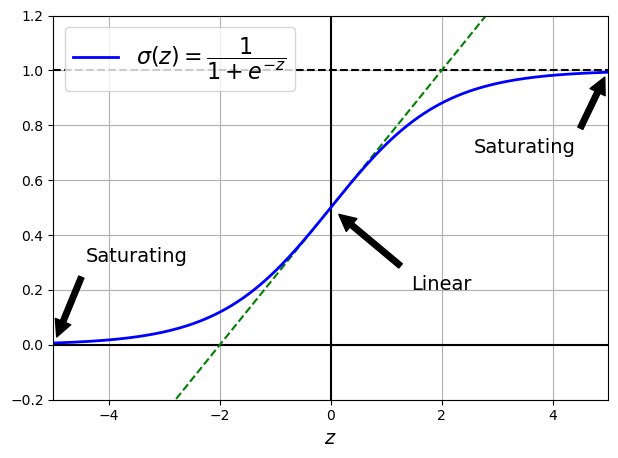

In [9]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

In [11]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [13]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

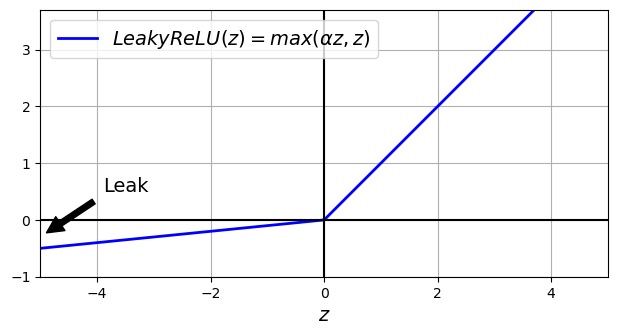

In [15]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

In [17]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

C:\Users\tglee\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [19]:
model = tf.keras.models.Sequential([
    # [...]  # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),  # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2),  # activation as a separate layer
    # [...]  # more layers
])

In [21]:
dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

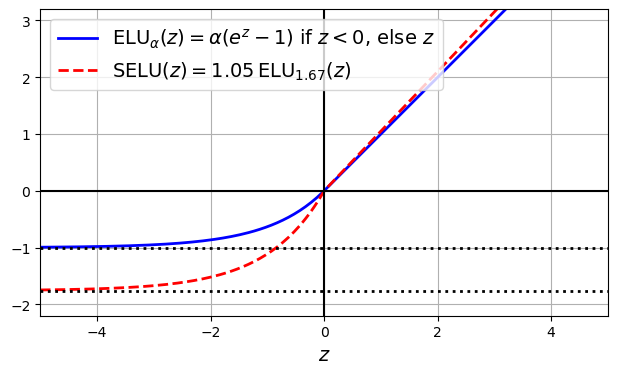

In [23]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [25]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

In [27]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

C:\Users\tglee\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [35]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.4617 - loss: 1.4507 - val_accuracy: 0.7006 - val_loss: 0.7948
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7102 - loss: 0.7869 - val_accuracy: 0.7648 - val_loss: 0.6505
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.7674 - loss: 0.6434 - val_accuracy: 0.7802 - val_loss: 0.5880
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8152 - loss: 0.5358 - val_accuracy: 0.8086 - val_loss: 0.5351
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8305 - loss: 0.4907 - val_accuracy: 0.8202 - val_loss: 0.5143


In [38]:
tf.random.set_seed(42)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.1921 - loss: 2.1363 - val_accuracy: 0.3700 - val_loss: 1.8320
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.3869 - loss: 1.5815 - val_accuracy: 0.5318 - val_loss: 1.1592
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.5538 - loss: 1.1004 - val_accuracy: 0.6630 - val_loss: 0.8507
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6205 - loss: 0.9447 - val_accuracy: 0.7092 - val_loss: 0.7577
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5973 - loss: 0.9918 - val_accuracy: 0.5744 - val_loss: 1.0105


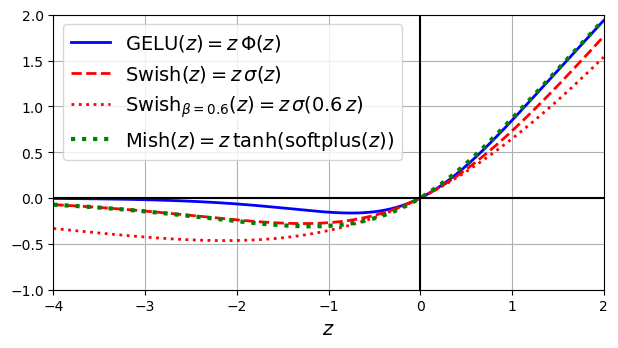

In [42]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

save_fig("gelu_swish_mish_plot")
plt.show()

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [46]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [47]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7599 - loss: 0.7131 - val_accuracy: 0.8540 - val_loss: 0.3992
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8589 - loss: 0.4063 - val_accuracy: 0.8620 - val_loss: 0.3669


In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7263 - loss: 0.8298 - val_accuracy: 0.8486 - val_loss: 0.4238
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8479 - loss: 0.4376 - val_accuracy: 0.8672 - val_loss: 0.3797


In [51]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [52]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [57]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5585 - loss: 1.4028 - val_accuracy: 0.7819 - val_loss: 0.6546
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8000 - loss: 0.6103 - val_accuracy: 0.8366 - val_loss: 0.5001
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8443 - loss: 0.4832 - val_accuracy: 0.8589 - val_loss: 0.4301
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8632 - loss: 0.4201 - val_accuracy: 0.8681 - val_loss: 0.3907
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8730 - loss: 0.3825 - val_accuracy: 0.8737 - val_loss: 0.3655
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8792 - loss: 0.3574 - val_accuracy: 0.8799 - val_loss: 0.3479
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8858 - loss: 0.3392 - val_accuracy: 0.8822 - val_loss: 0.3346
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8898 - loss: 0.3253 

In [58]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.5751 - loss: 0.7017 - val_accuracy: 0.5272 - val_loss: 0.6940
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5953 - loss: 0.6739 - val_accuracy: 0.5687 - val_loss: 0.6697
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6215 - loss: 0.6515 - val_accuracy: 0.6439 - val_loss: 0.6495
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6763 - loss: 0.6328 - val_accuracy: 0.7369 - val_loss: 0.6322
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.7487 - loss: 0.6163 - val_accuracy: 0.8061 - val_loss: 0.6168
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8452 - loss: 0.6011 - val_accuracy: 0.8447 - val_loss: 0.6029
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.8676 - loss: 0.5872 - val_accuracy: 0.8675 - val_loss: 0.5900
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8824 - loss: 0.5742 - val_accuracy: 0.8764 - val_loss: 0

[0.4674011170864105, 0.9120000004768372]

In [59]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [66]:
tf.random.set_seed(42)

In [67]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [68]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [69]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [70]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4350 - loss: 1.3004 - val_accuracy: 0.4896 - val_loss: 0.7976
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4878 - loss: 0.7682 - val_accuracy: 0.5321 - val_loss: 0.6904
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6026 - loss: 0.6725 - val_accuracy: 0.6103 - val_loss: 0.6660
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6593 - loss: 0.6459 - val_accuracy: 0.6647 - val_loss: 0.6492
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6970 - loss: 0.6188 - val_accuracy: 0.7240 - val_loss: 0.5999
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7606 - loss: 0.5674 - val_accuracy: 0.8042 - val_loss: 0.5513
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8364 - loss: 0.5171 - val_accuracy: 0.8447 - val_loss: 0.5095
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8699 - loss: 0.4737 - val_accuracy: 0.8803 - val_loss: 0.4736
Epoc

In [78]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9333 - loss: 0.2775


[0.2800838351249695, 0.9304999709129333]

In [79]:
1 - (100 - 93.85) / (100 - 91.85)

0.24539877300613477

In [80]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [81]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [82]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.6788 - loss: 0.9716 - val_accuracy: 0.8086 - val_loss: 0.5228
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8306 - loss: 0.4834 - val_accuracy: 0.8314 - val_loss: 0.4539
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8487 - loss: 0.4272 - val_accuracy: 0.8418 - val_loss: 0.4227
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8586 - loss: 0.3955 - val_accuracy: 0.8480 - val_loss: 0.4109
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8664 - loss: 0.3735 - val_accuracy: 0.8464 - val_loss: 0.4040
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8721 - loss: 0.3564 - val_accuracy: 0.8478 - val_loss: 0.3974
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8766 - loss: 0.3427 - val_accuracy: 0.8498 - val_loss: 0.3925
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8803 - loss: 0.

In [86]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [87]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6614 - loss: 1.0595 - val_accuracy: 0.8134 - val_loss: 0.5137
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8280 - loss: 0.4949 - val_accuracy: 0.8276 - val_loss: 0.4631
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8466 - loss: 0.4394 - val_accuracy: 0.8398 - val_loss: 0.4279
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8579 - loss: 0.4065 - val_accuracy: 0.8472 - val_loss: 0.4078
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8646 - loss: 0.3832 - val_accuracy: 0.8490 - val_loss: 0.3946
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8697 - loss: 0.3649 - val_accuracy: 0.8532 - val_loss: 0.3855
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8751 - loss: 0.3496 - val_accuracy: 0.8568 - val_loss: 0.3773
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8791 - loss: 0.3375

In [88]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [89]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6608 - loss: 1.0040 - val_accuracy: 0.8190 - val_loss: 0.5009
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8342 - loss: 0.4821 - val_accuracy: 0.8364 - val_loss: 0.4469
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8527 - loss: 0.4259 - val_accuracy: 0.8488 - val_loss: 0.4172
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8611 - loss: 0.3951 - val_accuracy: 0.8530 - val_loss: 0.4015
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8677 - loss: 0.3739 - val_accuracy: 0.8552 - val_loss: 0.3907
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8728 - loss: 0.3576 - val_accuracy: 0.8582 - val_loss: 0.3825
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8766 - loss: 0.3440 - val_accuracy: 0.8628 - val_loss: 0.3742
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8806 - los

In [90]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [91]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5715 - loss: 1.3988 - val_accuracy: 0.7878 - val_loss: 0.6711
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7877 - loss: 0.6559 - val_accuracy: 0.8132 - val_loss: 0.5734
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8109 - loss: 0.5756 - val_accuracy: 0.8232 - val_loss: 0.5317
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8201 - loss: 0.5369 - val_accuracy: 0.8292 - val_loss: 0.5067
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8272 - loss: 0.5124 - val_accuracy: 0.8320 - val_loss: 0.4897
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8319 - loss: 0.4952 - val_accuracy: 0.8326 - val_loss: 0.4768
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8359 - loss: 0.4822 - val_accuracy: 0.8366 - val_loss: 0.4668
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8390 - loss: 

In [92]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [93]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7603 - loss: 0.6616 - val_accuracy: 0.8270 - val_loss: 0.4517
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8543 - loss: 0.4036 - val_accuracy: 0.8524 - val_loss: 0.4058
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8692 - loss: 0.3678 - val_accuracy: 0.8356 - val_loss: 0.4730
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8738 - loss: 0.3576 - val_accuracy: 0.8614 - val_loss: 0.4133
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8777 - loss: 0.3470 - val_accuracy: 0.8438 - val_loss: 0.4759
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8778 - loss: 0.3469 - val_accuracy: 0.8470 - val_loss: 0.5263
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8819 - loss: 0.3404 - val_accuracy: 0.8686 - val_loss: 0.4401
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8826 - loss: 0.

In [94]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [95]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7693 - loss: 0.6444 - val_accuracy: 0.8358 - val_loss: 0.4184
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8571 - loss: 0.3894 - val_accuracy: 0.8418 - val_loss: 0.4088
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8711 - loss: 0.3463 - val_accuracy: 0.8526 - val_loss: 0.3777
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8818 - loss: 0.3202 - val_accuracy: 0.8558 - val_loss: 0.3741
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8877 - loss: 0.3001 - val_accuracy: 0.8666 - val_loss: 0.3620
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8950 - loss: 0.2849 - val_accuracy: 0.8704 - val_loss: 0.3417
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8987 - loss: 0.2715 - val_accuracy: 0.8702 - val_loss: 0.3493
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9024 - loss:

In [110]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [111]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6777 - loss: 0.9454 - val_accuracy: 0.8316 - val_loss: 0.4910
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8278 - loss: 0.4930 - val_accuracy: 0.8408 - val_loss: 0.4444
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8453 - loss: 0.4388 - val_accuracy: 0.8470 - val_loss: 0.4226
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8557 - loss: 0.4093 - val_accuracy: 0.8528 - val_loss: 0.4084
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8619 - loss: 0.3893 - val_accuracy: 0.8578 - val_loss: 0.3985
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8670 - loss: 0.3745 - val_accuracy: 0.8596 - val_loss: 0.3908
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8703 - loss: 0.3631 - val_accuracy: 0.8618 - val_loss: 0.3844
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8742 - loss

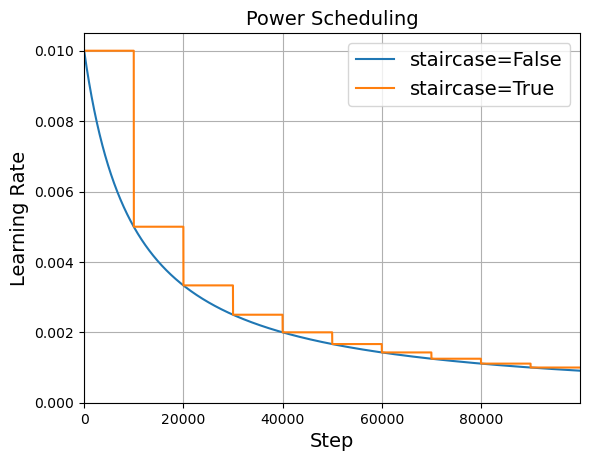

In [112]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [113]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [114]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.6887 - loss: 0.9448 - val_accuracy: 0.8334 - val_loss: 0.4883
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8288 - loss: 0.4916 - val_accuracy: 0.8402 - val_loss: 0.4448
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8457 - loss: 0.4394 - val_accuracy: 0.8476 - val_loss: 0.4245
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8551 - loss: 0.4111 - val_accuracy: 0.8500 - val_loss: 0.4099
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8619 - loss: 0.3925 - val_accuracy: 0.8554 - val_loss: 0.3977
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8662 - loss: 0.3793 - val_accuracy: 0.8578 - val_loss: 0.3889
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8696 - loss: 0.3694 - val_accuracy: 0.8604 - val_loss: 0.3814
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8719 - loss: 0.

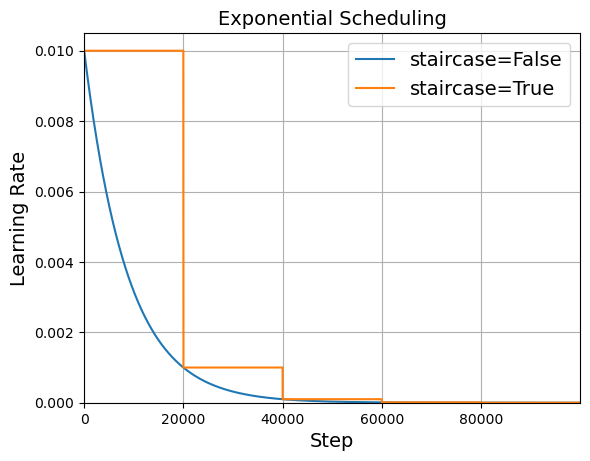

In [115]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [116]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [117]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [118]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [119]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.6864 - loss: 0.9569 - val_accuracy: 0.8344 - val_loss: 0.4739 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8308 - loss: 0.4854 - val_accuracy: 0.8390 - val_loss: 0.4401 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8478 - loss: 0.4338 - val_accuracy: 0.8458 - val_loss: 0.4234 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8571 - loss: 0.4051 - val_accuracy: 0.8502 - val_loss: 0.4103 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8633 - loss: 0.3853 - val_accuracy: 0.8554 - val_loss: 0.4005 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8678 - loss: 0.3702 - val_accuracy: 0.8604 - val_loss: 0.3912 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0

In [120]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

In [121]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = self.model.optimizer.learning_rate.numpy()
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        self.model.optimizer.learning_rate = new_learning_rate

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [122]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [123]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6691 - loss: 0.9818 - val_accuracy: 0.8318 - val_loss: 0.4921 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8268 - loss: 0.4961 - val_accuracy: 0.8392 - val_loss: 0.4497 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8451 - loss: 0.4447 - val_accuracy: 0.8460 - val_loss: 0.4299 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8558 - loss: 0.4158 - val_accuracy: 0.8546 - val_loss: 0.4139 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8611 - loss: 0.3959 - val_accuracy: 0.8564 - val_loss: 0.4019 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8661 - loss: 0.3805 - val_accuracy: 0.8590 - val_loss: 0.3915 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8693 - loss: 0.3683 - val_accuracy: 0.8600 - val_loss: 0.3841 - lr: 

In [124]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [127]:
history_piecewise_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6869 - loss: 0.9384 - val_accuracy: 0.8248 - val_loss: 0.5026
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8276 - loss: 0.4863 - val_accuracy: 0.8314 - val_loss: 0.4720
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8472 - loss: 0.4310 - val_accuracy: 0.8392 - val_loss: 0.4449
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8554 - loss: 0.4002 - val_accuracy: 0.8476 - val_loss: 0.4265
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8625 - loss: 0.3794 - val_accuracy: 0.8510 - val_loss: 0.4111
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8679 - loss: 0.3627 - val_accuracy: 0.8540 - val_loss: 0.3994
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8718 - loss: 0.3488 - val_accuracy: 0.8564 - val_loss: 0.3936
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8762 - loss: 0.3

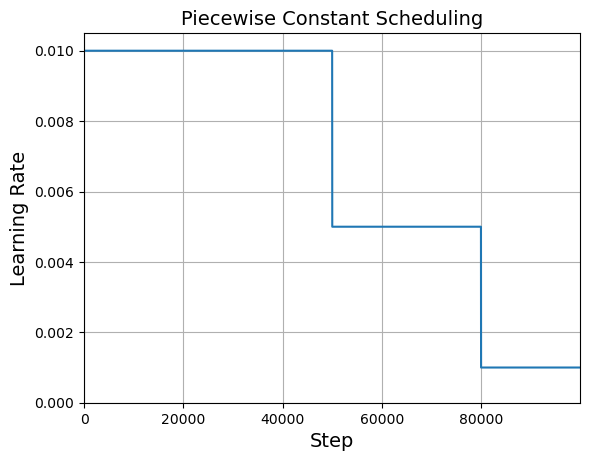

In [128]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [129]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [130]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [131]:
n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7588 - loss: 0.6893 - val_accuracy: 0.8188 - val_loss: 0.4749 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8394 - loss: 0.4563 - val_accuracy: 0.8180 - val_loss: 0.4749 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8483 - loss: 0.4332 - val_accuracy: 0.8314 - val_loss: 0.4575 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8528 - loss: 0.4173 - val_accuracy: 0.8364 - val_loss: 0.4554 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8563 - loss: 0.4137 - val_accuracy: 0.8382 - val_loss: 0.4774 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8702 - loss: 0.3715 - val_accuracy: 0.8324 - val_loss: 0.4991 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.

In [132]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"• {name} – {scheduler_class.__doc__.splitlines()[0]}")

• CosineDecay – A `LearningRateSchedule` that uses a cosine decay with optional warmup.
• CosineDecayRestarts – A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
• ExponentialDecay – A `LearningRateSchedule` that uses an exponential decay schedule.
• InverseTimeDecay – A `LearningRateSchedule` that uses an inverse time decay schedule.
• LearningRateSchedule – The learning rate schedule base class.
• PiecewiseConstantDecay – A `LearningRateSchedule` that uses a piecewise constant decay schedule.
• PolynomialDecay – A `LearningRateSchedule` that uses a polynomial decay schedule.


In [133]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [134]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6730 - loss: 0.9930 - val_accuracy: 0.8334 - val_loss: 0.4838 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8313 - loss: 0.4849 - val_accuracy: 0.8386 - val_loss: 0.4443 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8483 - loss: 0.4310 - val_accuracy: 0.8444 - val_loss: 0.4278 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8585 - loss: 0.4004 - val_accuracy: 0.8480 - val_loss: 0.4160 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.3789 - val_accuracy: 0.8488 - val_loss: 0.4105 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8715 - loss: 0.3617 - val_accuracy: 0.8522 - val_loss: 0.4012 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.87

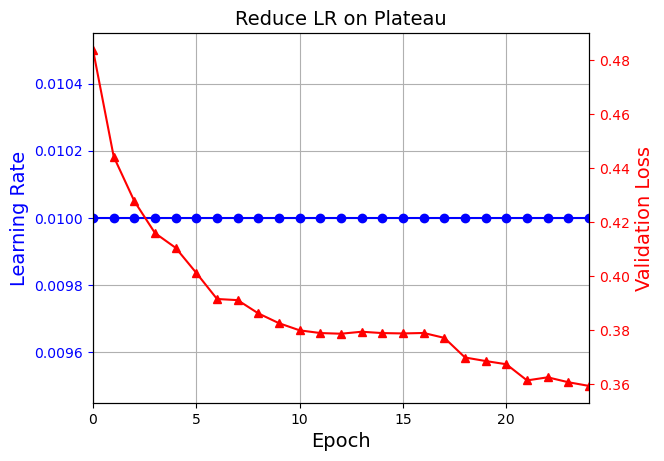

In [135]:
plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [138]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [159]:
tf.random.set_seed(42)

In [165]:
from functools import partial
import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7947 - loss: 3.2886 - val_accuracy: 0.8166 - val_loss: 0.7327
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8246 - loss: 0.7338 - val_accuracy: 0.8198 - val_loss: 0.7048


In [166]:
tf.random.set_seed(42)

In [167]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [177]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8333 - loss: 0.4517 - val_accuracy: 0.8540 - val_loss: 0.3845
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8411 - loss: 0.4298 - val_accuracy: 0.8636 - val_loss: 0.3591
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8508 - loss: 0.4078 - val_accuracy: 0.8616 - val_loss: 0.3562
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8531 - loss: 0.3947 - val_accuracy: 0.8714 - val_loss: 0.3345
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8593 - loss: 0.3821 - val_accuracy: 0.8708 - val_loss: 0.3418
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8618 - loss: 0.3738 - val_accuracy: 0.8698 - val_loss: 0.3361
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8644 - loss: 0.3632 - val_accuracy: 0.8724 - val_loss: 0.3284
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8666 - loss

In [178]:
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8932 - loss: 0.2738


[0.27767691016197205, 0.8914909362792969]

In [179]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8684 - loss: 0.3423


[0.3472224175930023, 0.868399977684021]

In [180]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [187]:
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7475 - loss: 0.7151 - val_accuracy: 0.8402 - val_loss: 0.4201
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8537 - loss: 0.4059 - val_accuracy: 0.8336 - val_loss: 0.4144
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8671 - loss: 0.3640 - val_accuracy: 0.8470 - val_loss: 0.3961
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8754 - loss: 0.3367 - val_accuracy: 0.8466 - val_loss: 0.3899
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8823 - loss: 0.3180 - val_accuracy: 0.8502 - val_loss: 0.3866
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8885 - loss: 0.3025 - val_accuracy: 0.8492 - val_loss: 0.3875
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8924 - loss: 0.2898 - val_accuracy: 0.8652 - val_loss: 0.3605
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8958 - loss